## Tarefas

### 0. Baixar o dataset pelo site ou pelo comando

```kaggle datasets download mlg-ulb/creditcardfraud``` 

# 1. Fazer a leitura do conjunto de dados  escolhido usando  bibliotecas prontas ou funções das linguagens de programação Python ou R, por exemplo a biblioteca Pandas do Python.

In [1]:
import pandas as pd
dtFolder = "../../datasets/"
df = pd.read_csv(dtFolder+"creditcardfraud.zip")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
# Class: 1 se fraude, 0 se legítimo
fraude = df["Class"].value_counts().rename("Legalidade")
fraude = fraude.rename({0:"Legítimo",1:"Fraude"}).sort_values()
fraude

Fraude         492
Legítimo    284315
Name: Legalidade, dtype: int64

In [3]:
maioresFraudes = df.loc[df["Class"] == 1][["Amount","Class"]].sort_values("Amount",ascending=False).head(10)
maioresFraudes.reset_index(drop=True).rename(columns={"Class":"Legalidade"})

,Amount,Legalidade
0,2125.87,1
1,1809.68,1
2,1504.93,1
3,1402.16,1
4,1389.56,1
5,1354.25,1
6,1335.00,1
7,1218.89,1
8,1096.99,1
9,996.27,1


# 2. Verificar se existem dados faltantes no conjunto de dados escolhido, caso sim, pesquise como lidar com eles.

In [4]:
# is null(0 ou 1) pra cada uma das colunas e soma a quantidade de nulos de cada coluna
qtdNulls = df.isnull().sum(axis = 0).rename("Qtd. de null")
qtdNulls

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Name: Qtd. de null, dtype: int64

# 3. Se o conjunto de dados escolhido é desbalanceado, aplique alguma técnica de rebalanceamento existente nas bibliotecas do Python ou R.

## Pré-Rebalanceamento

<AxesSubplot:title={'center':'Tipo de Transações'}>

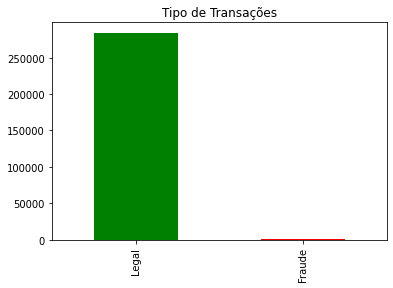

In [5]:
dfRen = df
dfRen.loc[dfRen["Class"] == 0, "Class"] = "Legal"
dfRen.loc[dfRen["Class"] == 1, "Class"] = "Fraude"
dfRen["Class"].value_counts().plot(kind="bar", color={"green":"Legal","red":"Fraude"}, title="Tipo de Transações") #lol

## Após rebalanceamento
Dentre as técnicas de rebalanceamento:

1. under sampling -> random
1. over sampling -> random, SMOTE (synthetic minority oversampling techinique)
1. hibrida -> SMOTE -> TOMEK 

Escolhemos utilizar random undersampling, já que nosso dataset possui a proporção de aproximadamente 1:500 entre os tipos de transação.

<AxesSubplot:title={'center':'Tipo de Transações'}>

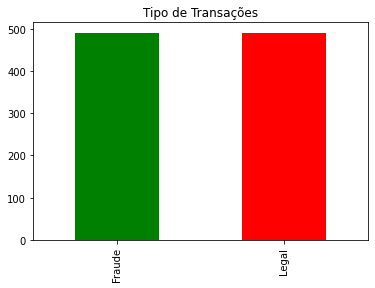

In [6]:
# Armazenando a quantidade de entradas de cada tipo de transação
count_legal, count_fraude = dfRen["Class"].value_counts()

# Separando o dataset em 2 dataframes, cada um contendo só um tipo de transação
df_legal = dfRen[dfRen["Class"] == "Legal"].reset_index()
df_fraude = dfRen[dfRen["Class"] == "Fraude"].reset_index()

# Escolhe aleatoriamente o mesmo número que temos em fraudes dentre o total de transações legais
df_legal_under = df_legal.sample(count_fraude) 

# Cria e exibe um dataframe a partir da junção dos 2, agora balanceados
df_balanced = pd.concat([df_fraude,df_legal_under], axis=0)
df_balanced["Class"].value_counts().plot(kind="bar",color={"green":"Legal","red":"Fraude"},title="Tipo de Transações")



# 4. Aplicar alguma técnica de normalização nos dados.


0.0017543859649122807

# 5. Fazer uma análise exploratória do conjunto de dados escolhido (calcular médias, medianas, variâncias, min, max)

In [7]:
df_balanced.describe()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,131080.410569,87951.880081,-2.406664,1.820616,-3.473758,2.271146,-1.599119,-0.739729,-2.751115,0.299366,...,0.181037,0.362477,0.024784,-0.023091,-0.044208,-0.000465,0.013028,0.076840,0.043779,103.582378
std,83755.796132,48212.836354,5.509689,3.702948,6.238709,3.191873,4.186557,1.714819,5.864914,4.841767,...,1.097678,2.779972,1.167821,1.160041,0.556753,0.674489,0.466873,1.047011,0.469646,225.724489
min,541.000000,406.000000,-30.552380,-15.295396,-31.103685,-4.022754,-22.105532,-6.785130,-43.557242,-41.044261,...,-6.048283,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.206846,-7.263482,-3.566764,0.000000
25%,54074.500000,46272.750000,-2.859468,-0.159932,-5.074851,-0.076021,-1.800483,-1.626177,-3.060742,-0.201521,...,-0.189561,-0.167704,-0.532288,-0.238443,-0.379574,-0.335916,-0.302218,-0.065219,-0.056757,1.100000
50%,133291.000000,80323.500000,-0.847970,1.008661,-1.379085,1.307692,-0.418430,-0.671312,-0.600693,0.151245,...,0.032049,0.162437,0.033940,-0.031591,0.012385,0.031814,-0.027794,0.058945,0.037642,18.970000
75%,203593.250000,134880.250000,0.994286,2.791569,0.391487,4.227639,0.426424,0.061614,0.287886,0.877002,...,0.441202,0.652748,0.564853,0.204340,0.370959,0.380408,0.322613,0.466568,0.225936,99.990000
max,284144.000000,172193.000000,2.330924,22.057729,3.092915,12.114672,11.095089,7.036568,7.769219,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.172913,2.208209,2.745261,3.052358,4.106596,2125.870000
